In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as se
import pandas as pd

In [3]:
df=pd.read_csv('MobileDataset.csv')

In [4]:
df.shape

(836, 10)

In [5]:
df.info

<bound method DataFrame.info of      Unnamed: 0                         Brand me  Ratings   RAM    ROM  \
0             0            LG V30+ (Black, 128 )      4.3   4.0  128.0   
1             1                       I Kall K11      3.4   6.0   64.0   
2             2                     Nokia 105 ss      4.3   4.0    4.0   
3             3  Samsung Galaxy A50 (White, 64 )      4.4   6.0   64.0   
4             4       POCO F1 (Steel Blue, 128 )      4.5   6.0  128.0   
..          ...                              ...      ...   ...    ...   
831         831             Karbonn K24 Plus Pro      3.8   6.0   32.0   
832         832                  InFocus POWER 2      4.1   8.0   64.0   
833         833  Alcatel 5V (Spectrum Blue, 32 )      4.4   3.0   32.0   
834         834                      JIVI JV 12M      3.7  10.0   32.0   
835         835                  Blacear B5 Grip      3.5   6.0   32.0   

     Mobile_Size  Primary_Cam  Selfi_Cam  Battery_Power  Price  
0           6.

In [6]:
df.describe() # statistical data of data 836 rows ratings 805 therefore null also present

,Unnamed: 0,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
count,836.000000,805.000000,829.000000,832.000000,834.000000,836.000000,567.000000,836.000000,836.00000
mean,417.500000,4.103106,6.066345,64.373077,5.597282,47.983254,9.784832,3274.688995,18220.34689
std,241.476707,0.365356,2.530336,53.447825,3.898664,11.170093,6.503838,927.518852,52805.55022
min,0.000000,2.800000,0.000000,0.000000,2.000000,5.000000,0.000000,1020.000000,479.00000
25%,208.750000,3.800000,6.000000,32.000000,4.500000,48.000000,5.000000,3000.000000,984.75000
50%,417.500000,4.100000,6.000000,40.000000,4.770000,48.000000,8.000000,3000.000000,1697.00000
75%,626.250000,4.400000,6.000000,64.000000,6.300000,48.000000,13.000000,3800.000000,18999.00000
max,835.000000,4.800000,34.000000,256.000000,44.000000,64.000000,61.000000,6000.000000,573000.00000


In [7]:
df.isna().sum() # used to check null data 


Unnamed: 0         0
Brand me           0
Ratings           31
RAM                7
ROM                4
Mobile_Size        2
Primary_Cam        0
Selfi_Cam        269
Battery_Power      0
Price              0
dtype: int64

In [27]:

df['Ratings']=df['Ratings'].fillna(df['Ratings'].mean())
df["RAM"]=df["RAM"].fillna(df["RAM"].mean())
df["ROM"]=df["ROM"].fillna(df["ROM"].mean())
df["Selfi_Cam"]=df["Selfi_Cam"].fillna(df["Selfi_Cam"].mean())
df["Mobile_Size"]=df["Mobile_Size"].fillna(df["Mobile_Size"].mean())


In [9]:
df.columns

Index(['Unnamed: 0', 'Brand me', 'Ratings', 'RAM', 'ROM', 'Mobile_Size',
       'Primary_Cam', 'Selfi_Cam', 'Battery_Power', 'Price'],
      dtype='object')

In [10]:
df.drop('Brand me',axis=1,inplace=True)

In [28]:
df.RAM=df.RAM.astype('int64')


In [29]:
df.ROM=df.ROM.astype("int64")

In [13]:
df.Selfi_Cam=df.Selfi_Cam.astype('int64')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     836 non-null    int64  
 1   Ratings        836 non-null    float64
 2   RAM            836 non-null    int64  
 3   ROM            836 non-null    int64  
 4   Mobile_Size    836 non-null    float64
 5   Primary_Cam    836 non-null    int64  
 6   Selfi_Cam      836 non-null    int64  
 7   Battery_Power  836 non-null    int64  
 8   Price          836 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 58.9 KB


In [15]:
corr=df.corr()

In [16]:
se.set(rc={'figure.figsize':(15,8)}) # to set the figure size

In [17]:
plt.figure(figsize=(14,14)) # to plot the figure using matplotlib

<Figure size 1008x1008 with 0 Axes>

<Figure size 1008x1008 with 0 Axes>

<AxesSubplot:>

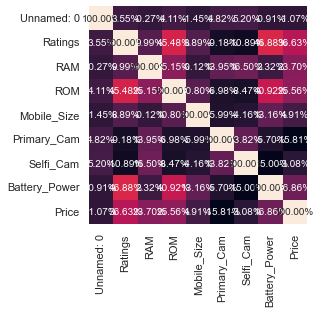

In [18]:
se.heatmap(corr,cbar=False,square=True,fmt='.2%',annot=True) # to plot the heat map using attributes

In [24]:
x=df.iloc[:,2:8].values # iloc colon seh pehle saari rows ko le liyaa aur 2 seh 8 coloumns tak values sehh array meh convert kar diyaa

In [25]:
y=df.iloc[:,-1].values # last columns ko le lenge

In [26]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=10)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier(n_estimators=15,random_state=0)

In [ ]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=15, random_state=0)

In [ ]:
rfc.score(xtrain,ytrain)

0.8502994011976048

In [ ]:
rfc.score(xtest,ytest)

0.44642857142857145

DecisionTreeRegressor(random_state=42)

In [ ]:
dtr.score(xtrain,ytrain)

0.9746413005435787

In [ ]:
dtr.score(xtest,ytest)

0.9661461992501748

In [ ]:
import pickle
pickle.dump(dtr,open('model.pkl','wb'))


In [ ]:
model=pickle.load(open("model.pkl",'rb'))

In [ ]:
final=np.array([4,128,6.3,64,28,5000])
prediction=model.predict(final.reshape(1,-1))
prediction[0]

13900.0